# Law of the LAR's knots

In this notebook, we present the law of the knots of the LAR. This result has been given in "*Multiple Testing and Variable Selection along Least Angle Regression's path*" (Azaïs and De Castro, 2019). 

## The recursive formulation of the LAR

We begin with a new recursive algorithm, equivalent to LAR, that produces the sequence $(i_k,\lambda_k)$ of indexes $i_k$ and knots $\lambda_k$ of the LAR. This program has been implemnted under the name **lar_rec** given in the file *multiple_spacing_tests.py*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from multiple_spacing_tests import lar_rec, generate_variables

The function **generate_variables** gives an istance of a high-dimensional regression problem with *predictors_number* the number of predictors, *sample_size* the sample size, *sparsity=0* the sparsity of the target vector (each nonzero entry is a Rademacher random variable $\{\pm 1\}$), $sigma=1$ the noise level. 

The matrix $Z$ is equal to $Z=X X^\top$ where $X$ is a design matrix given by drawing i.i.d. Gaussian rows. The matrix $R$ is given by $R=[Z, -Z; -Z, Z]$. The target vector is *beta_0* and the response variable is $Y$.

Here, $p=250$ (predictors number) and $n=50$ (sample size).

In [2]:
[Z,R,sigma,X,noise_correlation,sparsity,beta_0,Y]=generate_variables(predictors_number=250, sample_size=50)

We compute the LAR using the recursive formulation. See also the notebook *multiple_spacing_tests.ipynb* for a comparison with SciKitLearn version of LAR.

It returns the knots *lambas* and the indexes *indexes*. 

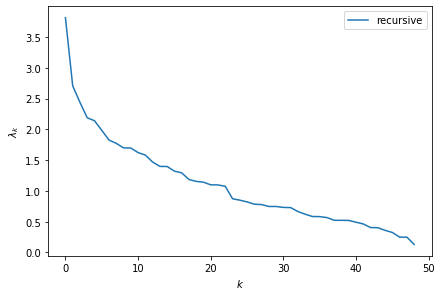

In [3]:
[lambdas, indexes, correls, R, Z] = lar_rec(X,Y)

k_max = np.size(indexes)

plt.plot(range(k_max-1),lambdas[:k_max-1])
plt.legend([r'recursive'])
plt.tight_layout()
plt.xlabel(r'$k$')
plt.ylabel(r'$\lambda_k$')
plt.show()

## The joint law of the knots

Given the joint law of the knots proved in "*Multiple Testing and Variable Selection along Least Angle Regression's path*" (Azaïs and De Castro, 2019), one can compute the conditional law of $\lambda_b\|\lambda_a,\lambda_c$ whose cdf is denoted by $\mathbb F_{abc}$. In particuler, our theoretical analysis shows that $\hat\alpha_{abc}=\mathbb F_{abc}(\lambda_b)$ is uniformly distributed under the null (i.e., the target vector is zero). 

One can compute $\hat\alpha_{abc}$ using the function **observed_significance_CBC**. CBC means Component-By-Component as in "*Fast algorithms for component-by-component construction of rank-1 lattice rules in shift-invariant reproducing kernel Hilbert spaces*" by D. Nuyens, R. Cools iun Mathematics of Computation, 2006. It is a lattice rule to compute the conditional marginal distribution of $\lambda_b$. 

Here, we compute $\hat\alpha_{136}$.

In [4]:
from multiple_spacing_tests import observed_significance_CBC

# compute the LAR
lars = [lambdas, indexes, correls]

# a (start), b (middle) and c (end)
start = 1
middle = 3
end = 6

# hat alpha 
alpha, __, __ = observed_significance_CBC(lars, sigma=sigma, start=start, end=end, middle=middle)

print("Observed significance is %s" % alpha)

Observed significance is 0.5104805749849506


By Monte Carlo, one can observe the law of $\hat\alpha_{abc}$. This is done by the command 

**empirical_law_first_knots(predictors_number=250,
                              sample_size=50,
                              end=5,
                              start=1,
                              iterations=5000,
                              display=1,
                              eval_points=99991)**
                              
over 5000 Monte Carlo simulations and 99991 points of Lattice rule. It took us several hours (around 20h) to run this command and we give you the result here. Of course, you can check that you get the same result by running the above command. Thank you for tyour time!

![Knots Law](img/laws_final.png)